# Chargement des données
Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *train* (3 images par classe), *validation* (1 image par classe) et *test* (1 image par classe). Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes.

Nous téléchargeons notre base de données qui est hébergée sur Github en faisaint un git clone.

In [29]:
!git clone https://github.com/NolanCOR/Database_Deep_Learning.git
path = "./Database_Deep_Learning/Apprentissage_Profond_DB/"

Cloning into 'Database_Deep_Learning'...
remote: Enumerating objects: 3374, done.
remote: Counting objects: 100% (3374/3374), done.
remote: Compressing objects: 100% (3370/3370), done.
remote: Total 3374 (delta 2), reused 3374 (delta 2), pack-reused 0
Receiving objects: 100% (3374/3374), 40.26 MiB | 43.91 MiB/s, done.
Resolving deltas: 100% (2/2), done.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.

In [30]:
import os
import shutil
import os
import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

Voici ensuite un exemple de chargement de vos données.

In [31]:
labels = labels = ['city', 'deserts', 'forests', 'mountains', 'oceans', 'plains', 'space']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

(2450, 64, 64, 3) (2450, 1)
(525, 64, 64, 3) (525, 1)
(525, 64, 64, 3) (525, 1)


Affichage de quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

<ipython-input-32-abc84072baa1>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


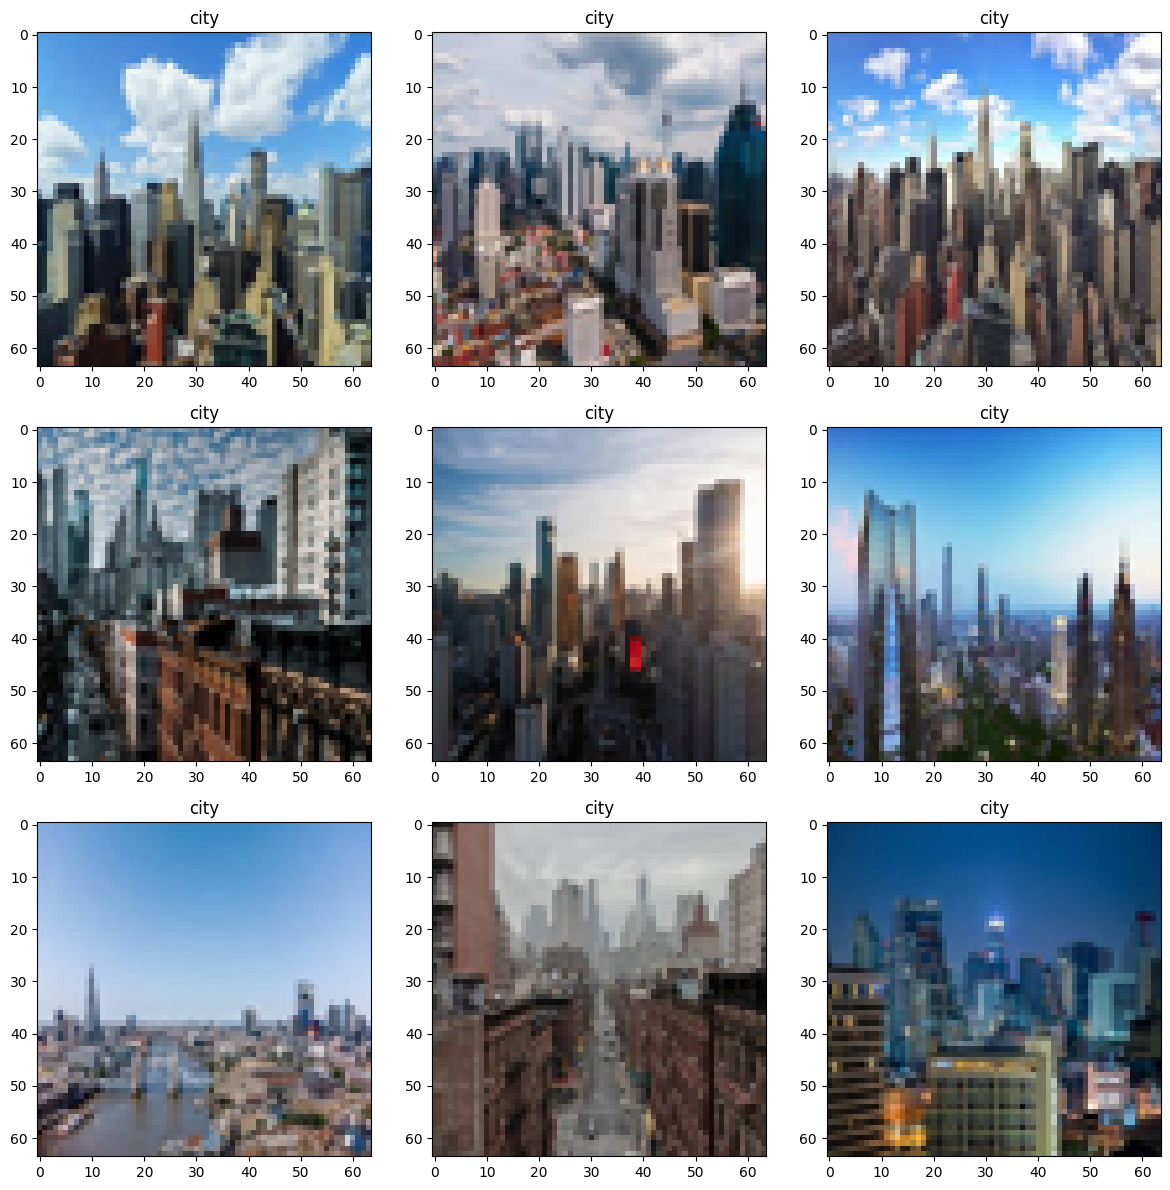

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()